In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import time

In [2]:
DATA_DIR = "C:/Users/adare/PycharmProjects/pythonProject1/data/raw-img"

images = []
labels = []

for folder_name in os.listdir(DATA_DIR):
    folder_path = os.path.join(DATA_DIR, folder_name)

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        with Image.open(file_path) as image:  # using with will ensure the file is closed
            images.append(image.copy())  # copy the image data into memory
        labels.append(folder_name)

In [4]:
encoder = LabelEncoder()
numeric_labels = encoder.fit_transform(labels)

TARGET_SIZE = (128, 128)
# Convert all images to RGB and resize
images_resized = [img.convert('RGB').resize(TARGET_SIZE) for img in images]

# Split data
X_train, X_test, y_train, y_test = train_test_split(images_resized, numeric_labels, test_size=0.2, random_state=42)

# Convert images to arrays and normalize with float32 type
X_train = np.array([np.array(img) for img in X_train], dtype=np.float32) / 255.0
X_test = np.array([np.array(img) for img in X_test], dtype=np.float32) / 255.0

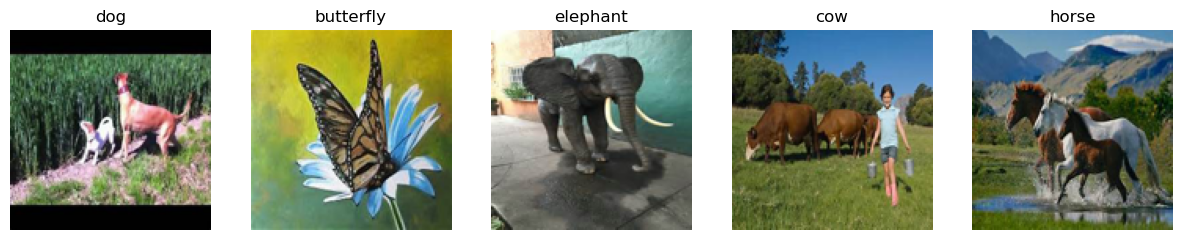

In [5]:
def show_images(images, labels, num=5):
    """Display a random selection of images and their labels."""
    indices = np.random.choice(len(images), num, replace=False)

    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[idx])
        plt.title(labels[idx])
        plt.axis('off')
    plt.show()
    plt.pause(0.1)  # add this line


show_images(images_resized, labels)
time.sleep(5)
plt.close('all')

In [7]:
unique_labels = set(labels)
print(unique_labels)

{'squirrel', 'cow', 'spider', 'horse', 'butterfly', 'cat', 'chicken', 'sheep', 'dog', 'elephant'}


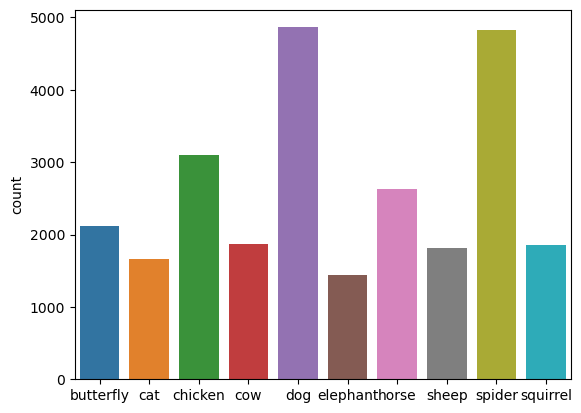

In [8]:
sns.countplot(x=labels)
plt.show()

In [24]:
from skimage.transform import resize

X_train_resized = np.array([resize(img, TARGET_SIZE) for img in X_train])

def undersample_data(X, y):
    # Get unique classes and their counts
    unique_classes, counts = np.unique(y, return_counts=True)
    
    # Determine the number of samples for the minority class
    min_count = min(counts)
    
    # Create empty lists to store the undersampled data
    X_undersampled = []
    y_undersampled = []

    # For each class, randomly sample without replacement
    for cls in unique_classes:
        indices = np.where(y == cls)[0]
        undersampled_indices = np.random.choice(indices, size=min_count, replace=False)
        
        X_undersampled.extend(X[undersampled_indices])
        y_undersampled.extend(y[undersampled_indices])

    return np.array(X_undersampled), np.array(y_undersampled)

# Apply the function to your data
X_train_undersampled, y_train_undersampled = undersample_data(X_train_resized, y_train)

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [25]:
import numpy as np

np.save('../data/X_train_undersampled.npy', X_train)
#np.save('../data/X_test.npy', X_test)

np.save('../data/y_train_undersampled.npy', y_train)
#np.save('../data/y_test.npy', y_test)

In [21]:
y_test

array([0, 7, 2, ..., 3, 8, 0], dtype=int64)

In [26]:
len(X_train_undersampled)

11800